In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from utils import *
from keras.models import Model, load_model, Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, BatchNormalization, Activation, MaxPooling2D, concatenate
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
from utils import *

In [6]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

# Load the trained model 

In [5]:
model_filename = os.path.join('./model', "inception_rmsprop")
new_model = tf.keras.models.load_model(model_filename)

2022-12-23 21:44:17.155213: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 21:44:17.168400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 21:44:17.170200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 21:44:17.172561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2input_2_2 (InputLayer)  [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                             

 activation_3 (Activation)      (None, 73, 73, 80)   0           ['batch_normalization_3[0][0]']  
                                                                                                  
 activation_97activation_97_2 (  (None, 73, 73, 80)  0           ['batch_normalization_97batch_nor
 Activation)                                                     malization_97_2[0][0]']          
                                                                                                  
 conv2d_4 (Conv2D)              (None, 71, 71, 192)  138240      ['activation_3[0][0]']           
                                                                                                  
 conv2d_98conv2d_98_2 (Conv2D)  (None, 71, 71, 192)  138240      ['activation_97activation_97_2[0]
                                                                 [0]']                            
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_5 (Conv2D)              (None, 35, 35, 64)   12288       ['max_pooling2d_1[0][0]']        
                                                                                                  
 conv2d_7 (Conv2D)              (None, 35, 35, 64)   76800       ['activation_6[0][0]']           
                                                                                                  
 conv2d_10 (Conv2D)             (None, 35, 35, 96)   82944       ['activation_9[0][0]']           
                                                                                                  
 conv2d_11 (Conv2D)             (None, 35, 35, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 conv2d_99conv2d_99_2 (Conv2D)  (None, 35, 35, 64)   12288       ['max_pooling2d_5max_pooling2d_5_
          

 conv2d_15 (Conv2D)             (None, 35, 35, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_109conv2d_109_2 (Conv2D  (None, 35, 35, 64)  16384       ['mixed0mixed0_2[0][0]']         
 )                                                                                                
                                                                                                  
 batch_normalization_15 (BatchN  (None, 35, 35, 64)  192         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_109batch_n  (None, 35, 35, 64)  192         ['conv2d_109conv2d_109_2[0][0]'] 
 ormalization_109_2 (BatchNorma                                                                   
 lization)

                                                                                                  
 batch_normalization_17 (BatchN  (None, 35, 35, 96)  288         ['conv2d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_18 (BatchN  (None, 35, 35, 64)  192         ['conv2d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_106batch_n  (None, 35, 35, 64)  192         ['conv2d_106conv2d_106_2[0][0]'] 
 ormalization_106_2 (BatchNorma                                                                   
 lization)                                                                                        
          

                                                                                                  
 batch_normalization_20 (BatchN  (None, 35, 35, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 35, 35, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_114batch_n  (None, 35, 35, 48)  144         ['conv2d_114conv2d_114_2[0][0]'] 
 ormalization_114_2 (BatchNorma                                                                   
 lization)                                                                                        
          

                                                                                                  
 activation_24 (Activation)     (None, 35, 35, 96)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_25 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 activation_113activation_113_2  (None, 35, 35, 64)  0           ['batch_normalization_113batch_no
  (Activation)                                                   rmalization_113_2[0][0]']        
                                                                                                  
 activation_115activation_115_2  (None, 35, 35, 64)  0           ['batch_normalization_115batch_no
  (Activation)                                                   rmalization_115_2[0][0]']        
          

 lization)                                                                                        
                                                                                                  
 batch_normalization_123batch_n  (None, 17, 17, 96)  288         ['conv2d_123conv2d_123_2[0][0]'] 
 ormalization_123_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 activation_26 (Activation)     (None, 17, 17, 384)  0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 activation_29 (Activation)     (None, 17, 17, 96)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 max_pooli

 ormalization_125_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 batch_normalization_130batch_n  (None, 17, 17, 128)  384        ['conv2d_130conv2d_130_2[0][0]'] 
 ormalization_130_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 activation_31 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_31[0][0]'] 
                                                                                                  
 activation_36 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_36[0][0]'] 
          

                                                                                                  
 batch_normalization_38 (BatchN  (None, 17, 17, 192)  576        ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_39 (BatchN  (None, 17, 17, 192)  576        ['conv2d_39[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_124batch_n  (None, 17, 17, 192)  576        ['conv2d_124conv2d_124_2[0][0]'] 
 ormalization_124_2 (BatchNorma                                                                   
 lization)                                                                                        
          

 ormalization_139_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 activation_45 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 activation_139activation_139_2  (None, 17, 17, 160)  0          ['batch_normalization_139batch_no
  (Activation)                                                   rmalization_139_2[0][0]']        
                                                                                                  
 conv2d_41 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_46

 conv2d_40 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_43 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_42[0][0]']          
                                                                                                  
 conv2d_48 (Conv2D)             (None, 17, 17, 192)  215040      ['activation_47[0][0]']          
                                                                                                  
 conv2d_49 (Conv2D)             (None, 17, 17, 192)  147456      ['average_pooling2d_4[0][0]']    
                                                                                                  
 conv2d_134conv2d_134_2 (Conv2D  (None, 17, 17, 192)  147456     ['mixed4mixed4_2[0][0]']         
 )                                                                                                
          

                                                                                                  
 conv2d_148conv2d_148_2 (Conv2D  (None, 17, 17, 160)  122880     ['mixed5mixed5_2[0][0]']         
 )                                                                                                
                                                                                                  
 batch_normalization_54 (BatchN  (None, 17, 17, 160)  480        ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_148batch_n  (None, 17, 17, 160)  480        ['conv2d_148conv2d_148_2[0][0]'] 
 ormalization_148_2 (BatchNorma                                                                   
 lization)                                                                                        
          

 batch_normalization_146batch_n  (None, 17, 17, 160)  480        ['conv2d_146conv2d_146_2[0][0]'] 
 ormalization_146_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 batch_normalization_151batch_n  (None, 17, 17, 160)  480        ['conv2d_151conv2d_151_2[0][0]'] 
 ormalization_151_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 activation_52 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_52[0][0]'] 
                                                                                                  
 activatio

                                                                                                  
 activation_147activation_147_2  (None, 17, 17, 192)  0          ['batch_normalization_147batch_no
  (Activation)                                                   rmalization_147_2[0][0]']        
                                                                                                  
 activation_152activation_152_2  (None, 17, 17, 192)  0          ['batch_normalization_152batch_no
  (Activation)                                                   rmalization_152_2[0][0]']        
                                                                                                  
 activation_153activation_153_2  (None, 17, 17, 192)  0          ['batch_normalization_153batch_no
  (Activation)                                                   rmalization_153_2[0][0]']        
                                                                                                  
 mixed6 (C

                                                                                                  
 activation_66 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_66[0][0]'] 
                                                                                                  
 activation_155activation_155_2  (None, 17, 17, 192)  0          ['batch_normalization_155batch_no
  (Activation)                                                   rmalization_155_2[0][0]']        
                                                                                                  
 activation_160activation_160_2  (None, 17, 17, 192)  0          ['batch_normalization_160batch_no
  (Activation)                                                   rmalization_160_2[0][0]']        
                                                                                                  
 conv2d_62 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_61[0][0]']          
          

 ormalization_154_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 batch_normalization_157batch_n  (None, 17, 17, 192)  576        ['conv2d_157conv2d_157_2[0][0]'] 
 ormalization_157_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 batch_normalization_162batch_n  (None, 17, 17, 192)  576        ['conv2d_162conv2d_162_2[0][0]'] 
 ormalization_162_2 (BatchNorma                                                                   
 lization)                                                                                        
          

 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 conv2d_164conv2d_164_2 (Conv2D  (None, 17, 17, 192)  147456     ['mixed7mixed7_2[0][0]']         
 )                                                                                                
                                                                                                  
 conv2d_168conv2d_168_2 (Conv2D  (None, 17, 17, 192)  258048     ['activation_167activation_167_2[
 )                                                               0][0]']                          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_80 (Conv2D)             (None, 8, 8, 448)    573440      ['mixed8[0][0]']                 
                                                                                                  
 conv2d_174conv2d_174_2 (Conv2D  (None, 8, 8, 448)   573440      ['mixed8mixed8_2[0][0]']         
 )                                                                                                
                                                                                                  
 batch_normalization_80 (BatchN  (None, 8, 8, 448)   1344        ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_174batch_n  (None, 8, 8, 448)   1344        ['conv2d_174conv2d_174_2[0][0]'] 
 ormalizat

                                                                                                  
 batch_normalization_79 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_79[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_82 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_82[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_83 (BatchN  (None, 8, 8, 384)   1152        ['conv2d_83[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_84

                                                                  'activation_173activation_173_2[
                                                                 0][0]']                          
                                                                                                  
 concatenate_2concatenate_2_2 (  (None, 8, 8, 768)   0           ['activation_176activation_176_2[
 Concatenate)                                                    0][0]',                          
                                                                  'activation_177activation_177_2[
                                                                 0][0]']                          
                                                                                                  
 activation_178activation_178_2  (None, 8, 8, 192)   0           ['batch_normalization_178batch_no
  (Activation)                                                   rmalization_178_2[0][0]']        
          

 average_pooling2d_8 (AveragePo  (None, 8, 8, 2048)  0           ['mixed9[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_181conv2d_181_2 (Conv2D  (None, 8, 8, 384)   442368      ['activation_180activation_180_2[
 )                                                               0][0]']                          
                                                                                                  
 conv2d_182conv2d_182_2 (Conv2D  (None, 8, 8, 384)   442368      ['activation_180activation_180_2[
 )                                                               0][0]']                          
                                                                                                  
 conv2d_185conv2d_185_2 (Conv2D  (None, 8, 8, 384)   442368      ['activation_184activation_184_2[
 )        

                                                                                                  
 activation_186activation_186_2  (None, 8, 8, 384)   0           ['batch_normalization_186batch_no
  (Activation)                                                   rmalization_186_2[0][0]']        
                                                                                                  
 batch_normalization_187batch_n  (None, 8, 8, 192)   576         ['conv2d_187conv2d_187_2[0][0]'] 
 ormalization_187_2 (BatchNorma                                                                   
 lization)                                                                                        
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

# Slide 64

In [28]:
#create the patches for testing 
slide_path = "tumor_064.tif"
tumor_mask_path = "tumor_064_mask.tif"
levels = (2,3)
slide_windows1, slide_windows2, window_labels, coord_1, coord_2 =get_test_windows(slide_path,
                                                                                  tumor_mask_path, 
                                                                                  levels,
                                                                                  stride=150, 
                                                                                  window_len=299)

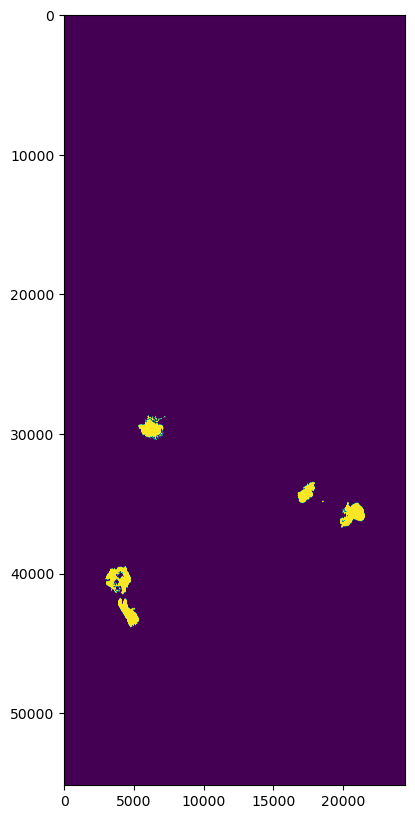

241/241 [==============================] - 13s 47ms/step


In [29]:
tumor_mask = open_slide(tumor_mask_path)
# Example: read the entire  at the same zoom level
mask_image = read_slide(tumor_mask, 
                        x=0, 
                        y=0, 
                        level=2, 
                        width=tumor_mask.level_dimensions[2][0], 
                        height=tumor_mask.level_dimensions[2][1])

mask_image = mask_image[:,:,0]

plt.figure(figsize=(10,10), dpi=100)
plt.imshow(mask_image)
plt.show()
slide = open_slide(slide_path)
# Example: read the entire mask at the same zoom level
slide_image = read_slide(slide, 
                        x=0, 
                        y=0, 
                        level=2, 
                        width=slide.level_dimensions[2][0], 
                        height=slide.level_dimensions[2][1])

#preprocess the windows 
slide_windows1, slide_windows2 = preprocess(np.array(slide_windows1)), preprocess(np.array(slide_windows2))


#create the dataset into tensor with batch
test_ds1 = create_test_tfdataset(slide_windows1[0:len(slide_windows1)//2], slide_windows2[0:len(slide_windows1)//2])

pred1 = new_model.predict(test_ds1, verbose = 1)

del test_ds1

test_ds2 = create_test_tfdataset(slide_windows1[len(slide_windows1)//2:], 
                                 slide_windows2[len(slide_windows1)//2:])




pred2 = new_model.predict(test_ds2, verbose = 1)

pred = np.concatenate([pred1, pred2])

del test_ds2


accuracy: 0.8536585365853658
AUC for ROC Curve :0.5759646595601652


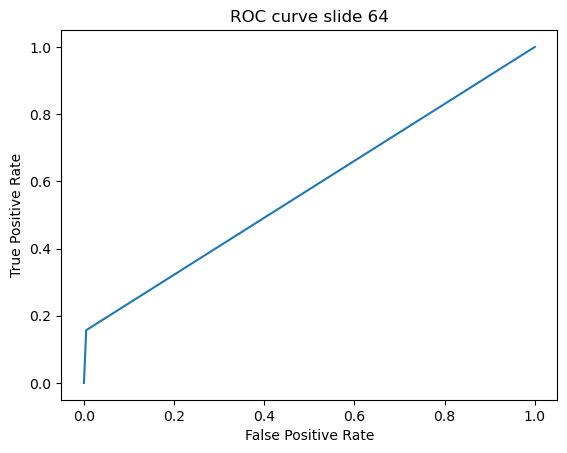

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1602
           1       0.86      0.16      0.27       325

    accuracy                           0.85      1927
   macro avg       0.86      0.58      0.59      1927
weighted avg       0.86      0.85      0.81      1927



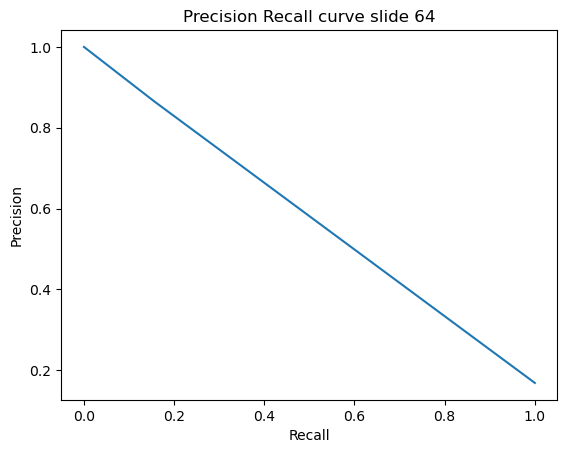

AUC for Precision Recall Curve :0.5817598945608585 


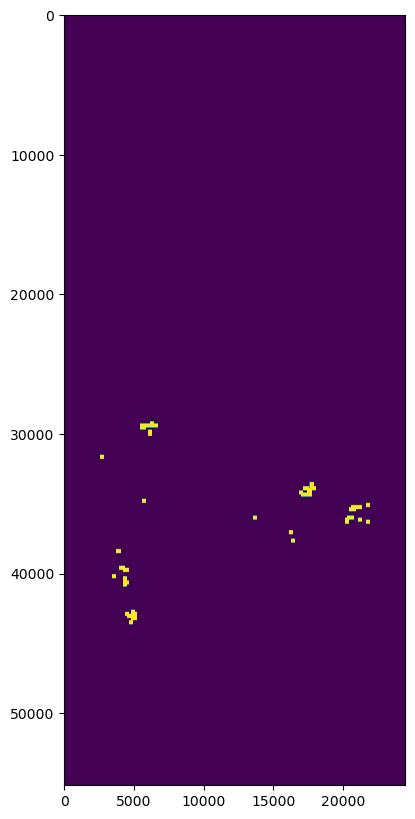

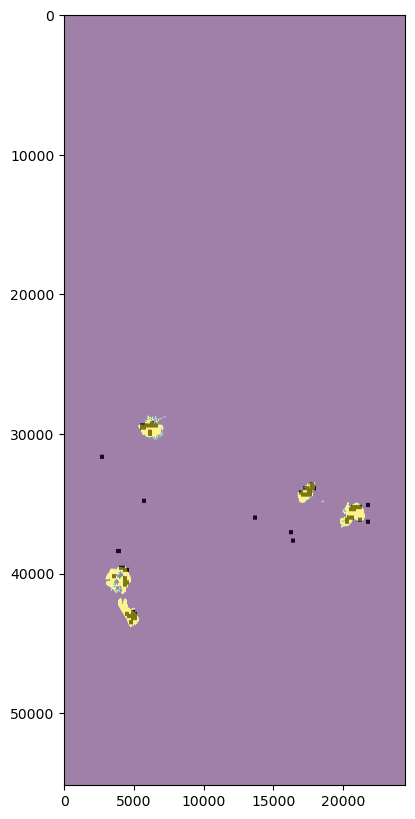

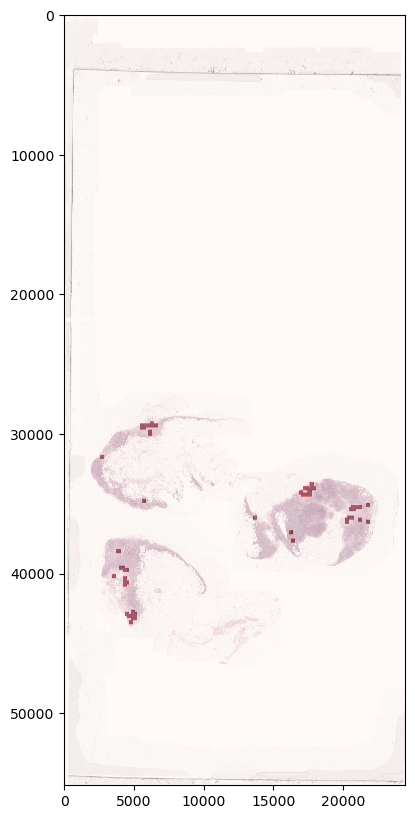

In [31]:
#generate the heat map
heatmap = np.zeros_like(mask_image)

class_pred = generate_heat_map(new_model, pred, coord_1, heatmap, 0.3)


# Evaluate on slide 

class_pred = np.array(class_pred)

label = np.array(window_labels)

evaluate(label, class_pred, "slide 64")

draw_overlap(mask_image, heatmap, slide_image)

# Evaluate on slide 101

In [7]:
slide_path = "tumor_101.tif"
tumor_mask_path = "tumor_101_mask.tif"
levels = (2,3)
slide_windows1, slide_windows2, window_labels, coord_1, coord_2 =get_test_windows(slide_path,
                                                                                  tumor_mask_path, 
                                                                                  levels,
                                                                                  stride=150, 
                                                                                  window_len=299)

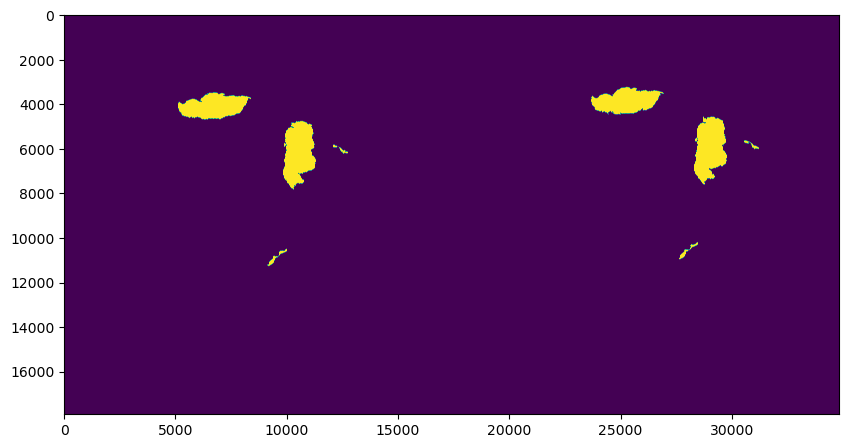

2022-12-23 21:53:13.600724: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200


703/703 [==============================] - 36s 46ms/step


In [8]:
tumor_mask = open_slide(tumor_mask_path)
# Example: read the entire msliask at the same zoom level
mask_image = read_slide(tumor_mask, 
                        x=0, 
                        y=0, 
                        level=2, 
                        width=tumor_mask.level_dimensions[2][0], 
                        height=tumor_mask.level_dimensions[2][1])

mask_image = mask_image[:,:,0]

plt.figure(figsize=(10,10), dpi=100)
plt.imshow(mask_image)
plt.show()
slide = open_slide(slide_path)
# Example: read the entire mask at the same zoom level
slide_image = read_slide(slide, 
                        x=0, 
                        y=0, 
                        level=2, 
                        width=slide.level_dimensions[2][0], 
                        height=slide.level_dimensions[2][1])

slide_windows1, slide_windows2 = preprocess(np.array(slide_windows1)), preprocess(np.array(slide_windows2))


test_ds1 = create_test_tfdataset(slide_windows1[0:len(slide_windows1)//2], slide_windows2[0:len(slide_windows1)//2])

pred1 = new_model.predict(test_ds1, verbose = 1)

del test_ds1

test_ds2 = create_test_tfdataset(slide_windows1[len(slide_windows1)//2:], 
                                 slide_windows2[len(slide_windows1)//2:])




pred2 = new_model.predict(test_ds2, verbose = 1)

pred = np.concatenate([pred1, pred2])

del test_ds2


accuracy: 0.9125177809388336
AUC for ROC Curve :0.6455039810754674


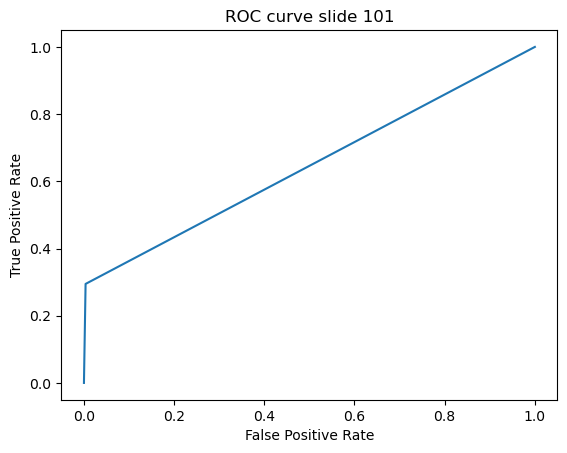

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4952
           1       0.92      0.29      0.45       672

    accuracy                           0.91      5624
   macro avg       0.91      0.65      0.70      5624
weighted avg       0.91      0.91      0.89      5624



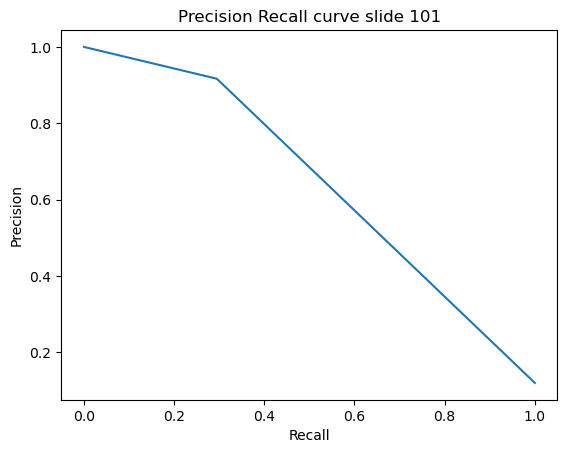

AUC for Precision Recall Curve :0.6477955869403237 


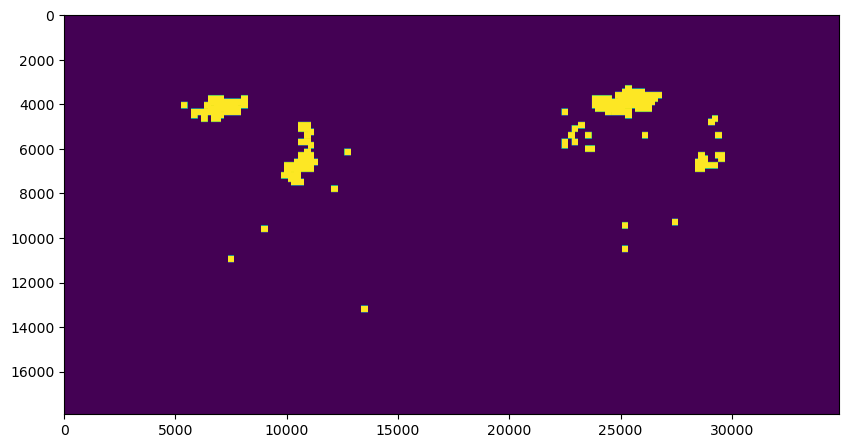

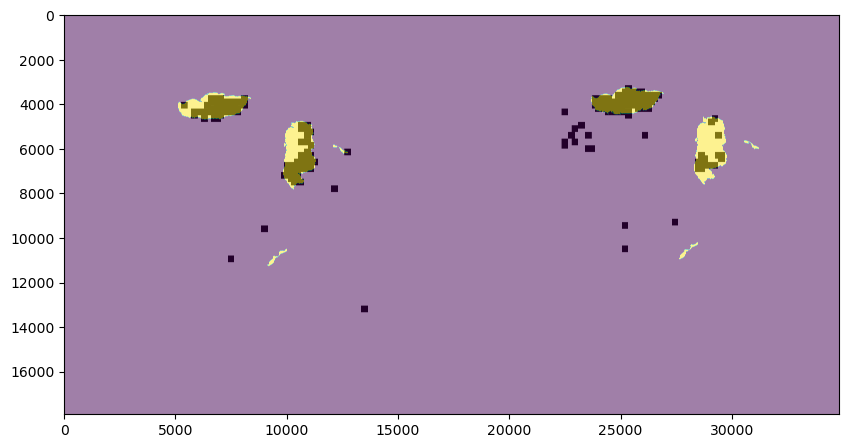

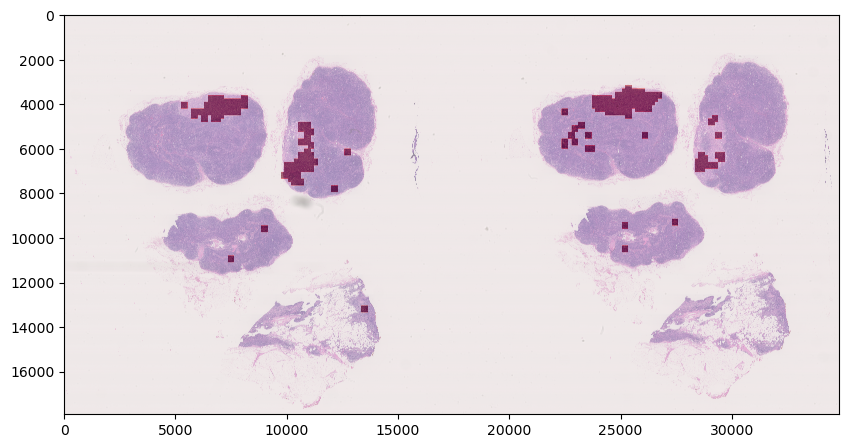

In [12]:
heatmap = np.zeros_like(mask_image)

class_pred = generate_heat_map(new_model, pred, coord_1, heatmap, 0.8)


# Evaluate on slide 

class_pred = np.array(class_pred)

label = np.array(window_labels)

evaluate(label, class_pred, "slide 101")

draw_overlap(mask_image, heatmap, slide_image)

# 110 Slide

In [13]:
slide_path = "tumor_110.tif"
tumor_mask_path = "tumor_110_mask.tif"
levels = (2,3)
slide_windows1, slide_windows2, window_labels, coord_1, coord_2 =get_test_windows(slide_path,
                                                                                  tumor_mask_path, 
                                                                                  levels,
                                                                                  stride=150, 
                                                                                  window_len=299)

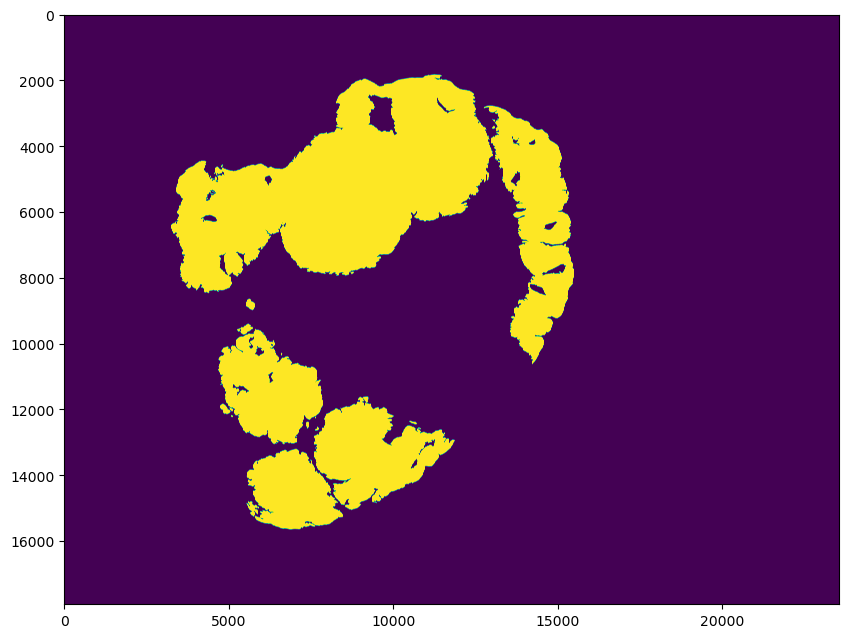

705/705 [==============================] - 36s 46ms/step


In [14]:
tumor_mask = open_slide(tumor_mask_path)
# Example: read the entire msliask at the same zoom level
mask_image = read_slide(tumor_mask, 
                        x=0, 
                        y=0, 
                        level=2, 
                        width=tumor_mask.level_dimensions[2][0], 
                        height=tumor_mask.level_dimensions[2][1])


mask_image = mask_image[:,:,0]

plt.figure(figsize=(10,10), dpi=100)
plt.imshow(mask_image)
plt.show()
slide = open_slide(slide_path)
# Example: read the entire mask at the same zoom level
slide_image = read_slide(slide, 
                        x=0, 
                        y=0, 
                        level=2, 
                        width=slide.level_dimensions[2][0], 
                        height=slide.level_dimensions[2][1])


slide_windows1, slide_windows2 = preprocess(np.array(slide_windows1)), preprocess(np.array(slide_windows2))


test_ds1 = create_test_tfdataset(slide_windows1[0:len(slide_windows1)//2], slide_windows2[0:len(slide_windows1)//2])

pred1 = new_model.predict(test_ds1, verbose = 1)

del test_ds1

test_ds2 = create_test_tfdataset(slide_windows1[len(slide_windows1)//2:], 
                                 slide_windows2[len(slide_windows1)//2:])




pred2 = new_model.predict(test_ds2, verbose = 1)

pred = np.concatenate([pred1, pred2])

del test_ds2



accuracy: 0.7524383755985103
AUC for ROC Curve :0.780263675946831


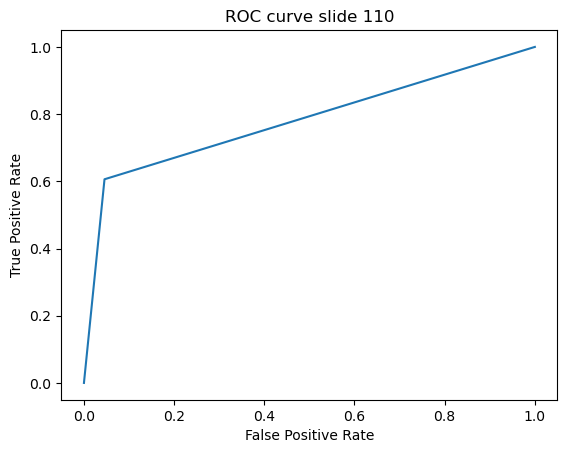

              precision    recall  f1-score   support

           0       0.64      0.95      0.76      2369
           1       0.95      0.61      0.74      3270

    accuracy                           0.75      5639
   macro avg       0.79      0.78      0.75      5639
weighted avg       0.82      0.75      0.75      5639



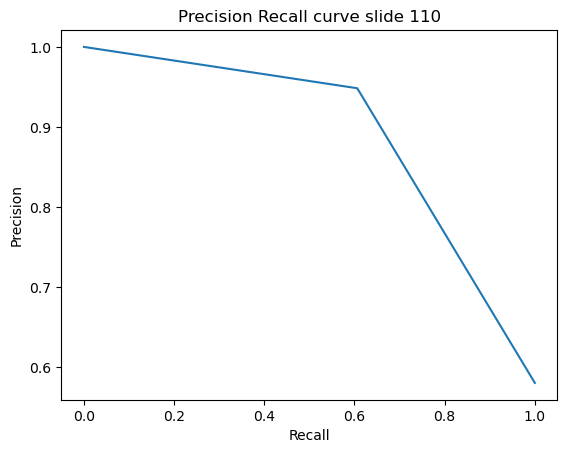

AUC for Precision Recall Curve :0.8914254296152402 


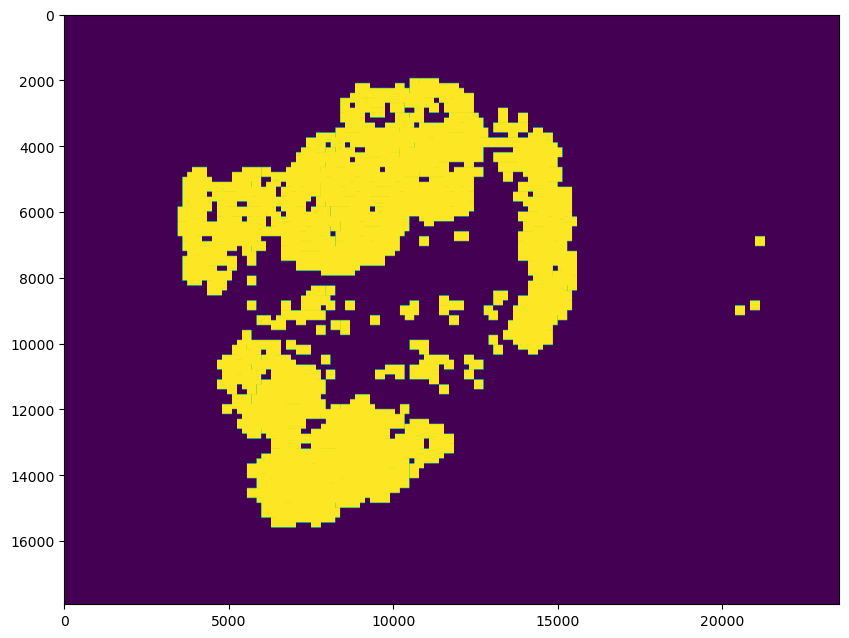

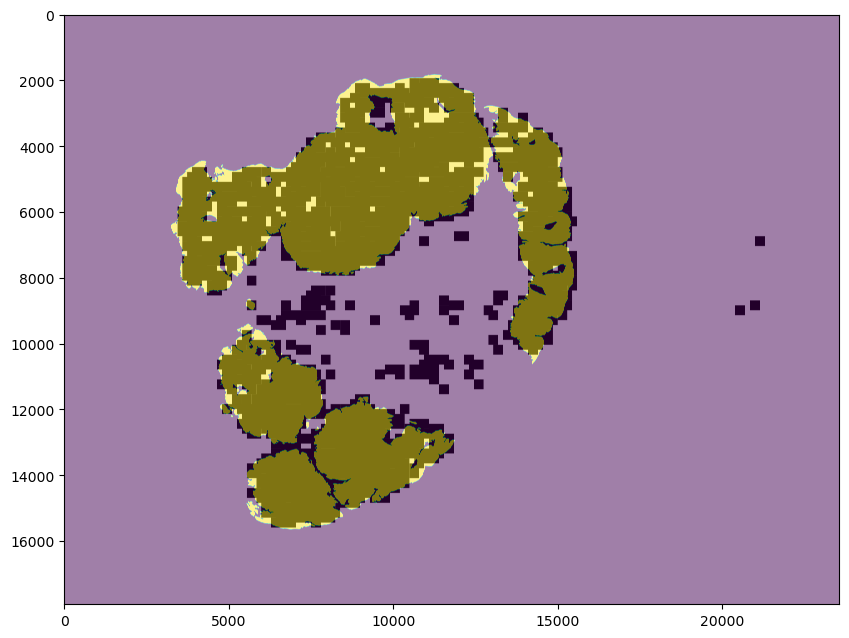

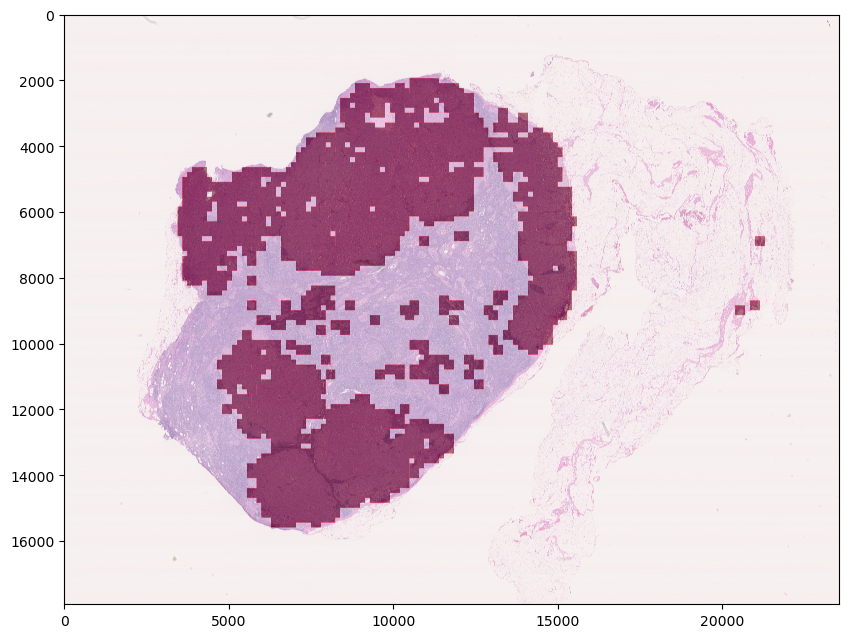

In [16]:
heatmap = np.zeros_like(mask_image)

class_pred = generate_heat_map(new_model, pred, coord_1, heatmap, 0.5)


# Evaluate on slide 

class_pred = np.array(class_pred)

label = np.array(window_labels)

evaluate(label, class_pred, "slide 110")

draw_overlap(mask_image, heatmap, slide_image)